In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import open3d as o3d
import os, sys, glob
import pdal
import laspy as lp

from time import process_time

In [254]:
# define the path of the data stored
datapath = '../data/mock_vel2'

# read the numpy files
files = {}
for file in glob.glob(os.path.join(datapath, 'toy0*.numpy')):
    df = np.loadtxt(file)
    filename = file.split('/')[-1]
    if df.shape[0] > 0:
        files[filename] = df
    else:
        print('file %s empty' %(filename))
    
# concatenate all data
df = np.concatenate(list(files.values()))
df.shape

/var/folders/q_/0v3pvd_d5j50tfyhznx7xsph0000gn/T/ipykernel_64990/1375983129.py:7: UserWarning: loadtxt: Empty input file: "../data/mock_vel2/toy00001.numpy"
  df = np.loadtxt(file)


file toy00001.numpy empty


/var/folders/q_/0v3pvd_d5j50tfyhznx7xsph0000gn/T/ipykernel_64990/1375983129.py:7: UserWarning: loadtxt: Empty input file: "../data/mock_vel2/toy00003.numpy"
  df = np.loadtxt(file)


file toy00003.numpy empty


/var/folders/q_/0v3pvd_d5j50tfyhznx7xsph0000gn/T/ipykernel_64990/1375983129.py:7: UserWarning: loadtxt: Empty input file: "../data/mock_vel2/toy00031.numpy"
  df = np.loadtxt(file)
/var/folders/q_/0v3pvd_d5j50tfyhznx7xsph0000gn/T/ipykernel_64990/1375983129.py:7: UserWarning: loadtxt: Empty input file: "../data/mock_vel2/toy00033.numpy"
  df = np.loadtxt(file)


file toy00031.numpy empty
file toy00033.numpy empty


/var/folders/q_/0v3pvd_d5j50tfyhznx7xsph0000gn/T/ipykernel_64990/1375983129.py:7: UserWarning: loadtxt: Empty input file: "../data/mock_vel2/toy00036.numpy"
  df = np.loadtxt(file)


file toy00036.numpy empty


(980446, 16)

In [255]:
# pass this to a pandas data frame for simplicity
scan = pd.DataFrame(df, columns=['timestamp', 'yaw', 'pitch', 'distance','distance_noise',
                                'x','y','z',
                                'x_noise','y_noise','z_noise',
                                'object_id', 'color0', 'color1','color2', 'idx'])

scan.head()

,timestamp,yaw,pitch,distance,distance_noise,x,y,z,x_noise,y_noise,z_noise,object_id,color0,color1,color2,idx
0,0.298264,6.174102,-0.43447,19.013216,18.927129,-11.502816,-10.993846,-5.631300e-07,-11.550941,-10.932338,0.036217,1.851878e+09,204.0,204.0,204.0,0.0
1,0.298278,6.174975,-0.43447,19.013147,18.940678,-11.491014,-10.984508,-2.093439e-07,-11.531571,-10.932765,0.030488,1.851878e+09,204.0,204.0,204.0,0.0
2,0.298292,6.175848,-0.43447,19.013079,18.922181,-11.479217,-10.975157,-8.198258e-07,-11.530144,-10.910300,0.038241,1.851878e+09,204.0,204.0,204.0,0.0
3,0.298306,6.176720,-0.43447,19.013010,18.929125,-11.467432,-10.965796,-1.425127e-06,-11.514482,-10.905985,0.035290,1.851878e+09,204.0,204.0,204.0,0.0
4,0.298319,6.177593,-0.43447,19.012938,18.943032,-11.455655,-10.956425,-1.277076e-07,-11.494909,-10.906614,0.029411,1.851878e+09,204.0,204.0,204.0,0.0


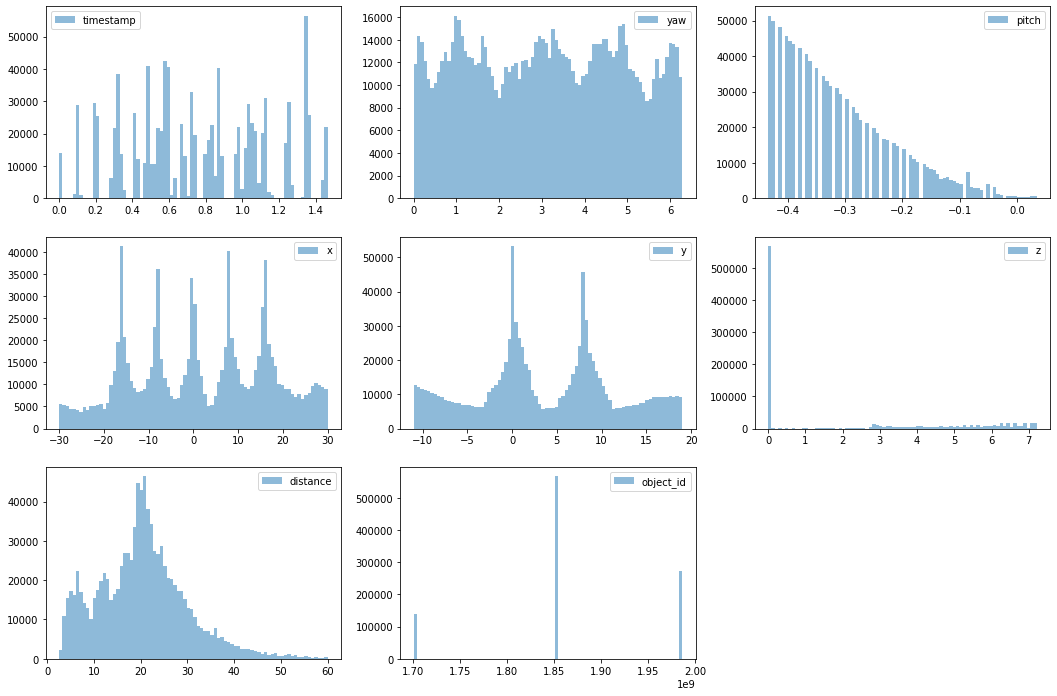

In [4]:
# Here we show how some of the point cloud parameters looks like.
cols = ['timestamp', 'yaw', 'pitch',
        'x','y','z',
        'distance', 'object_id']

plt.figure(figsize=(18, 4*3))

for num, i in enumerate(cols):
    
    plt.subplot(3,3,num+1)
    plt.hist(scan[i], 80, alpha=0.5, label=i)
    plt.legend()

The `object_id` parameter is a label for the leaves, the stems and the ground/soil. Below we plot these id's as a function of distance.

1851878480.0
1986094444.0
1701147252.0


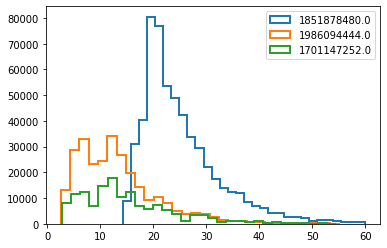

In [5]:
for i in set(scan['object_id']):
    print(i)
    mask = scan['object_id'] == i
    plt.hist(scan['distance'][mask], 30, histtype='step', lw=2, label=str(i))
    plt.legend()

## Save to PCD file

In [256]:
points = np.vstack((np.array(scan['x']), np.array(scan['y']), np.array(scan['z']))).transpose()

In [257]:
#
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)
o3d.io.write_point_cloud('../data/mock_vel2/toy.pcd', pcd)

True

In [290]:
pcd = o3d.io.read_point_cloud('../data/mock_vel2/toy.pcd')
o3d.visualization.draw_geometries([pcd])

In [252]:
# Check treeseg can read the output PCD files
!pcl_viewer ../data/mock_vel2/toy.pcd

The viewer window provides interactive commands; for help, press 'h' or 'H' from within the window.
> Loading ../data/mock_vel2/toy.pcd [PCLVisualizer::setUseVbos] Has no effect when OpenGL version is ≥ 2
[done, 1101.79 ms : 980446 points]
Available dimensions: x y z


## Save leaves only to PCD

In [9]:
### get the leaves only
leaves = scan['object_id'] == 1986094444.0
#
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[leaves])
o3d.io.write_point_cloud('../data/mock_vel2/toy_leaves.pcd', pcd)

True

In [294]:
pcd = o3d.io.read_point_cloud('../data/mock_vel2/toy_leaves.pcd')
o3d.visualization.draw_geometries([pcd])

In [10]:
!pcl_viewer ../data/mock_vel2/toy_leaves.pcd

The viewer window provides interactive commands; for help, press 'h' or 'H' from within the window.
> Loading ../data/mock_vel2/toy_leaves.pcd [PCLVisualizer::setUseVbos] Has no effect when OpenGL version is ≥ 2
[done, 1175.9 ms : 272657 points]
Available dimensions: x y z


## Save to `las` file with `PDAL`

In [11]:
json = """
{
    "pipeline":[
         "../data/mock_vel2/toy_leaves.pcd",
         {
          "type" : "writers.las",
          "forward": "all",
          "filename" : "../data/mock_vel2/toy_leaves.las"
         }   
    ]
}
"""

pipeline = pdal.Pipeline(json)
count = pipeline.execute()
arrays = pipeline.arrays
metadata = pipeline.metadata
log = pipeline.log

## Computing Normals for each point

Normals can be computed with `PDAL` or with `Object3D`, both give similar results and are relative fast. In order to vizualise the normals we use

```python
o3d.visualization.draw_geometries([<PCD_FILE>])
```

since `PCL_VIEWER` is having problems finding the normals. `Object3D` normals can be plotted strigthforward with the `03d.visualization` tool just pressing the key `n`, however, `PDAL` normals have to be modified in the column names from `normalx` to `normal_x`, and the same for `y` and `z`.

In [4]:
# Normals with PDAL
json = """
{
    "pipeline":[
         "../data/mock_vel2/toy_leaves.pcd",
         {
        "type":"filters.normal",
        "knn":8
        },
        {
        "type":"writers.bpf",
        "filename":"../data/mock_vel2/toy_leaves_normals.bpf",
        "output_dims":"X,Y,Z,NormalX,NormalY,NormalZ"
        },
        "../data/mock_vel2/toy_leaves_normals.bpf",
        {
        "type":"writers.pcd",
        "filename":"../data/mock_vel2/toy_leaves_normals.pcd"
        },
        {
        "type":"writers.las",
        "filename":"../data/mock_vel2/toy_leaves_normals.las"
        }
    ]
}
"""

pipeline = pdal.Pipeline(json)
count = pipeline.execute()
arrays = pipeline.arrays
metadata = pipeline.metadata
log = pipeline.log

(writers.las Error) writers.las: Attempting to write '../data/mock_vel2/toy_leaves_normals.las' with multiple point spatial references.


In [295]:
# Normals wiht o3d

downpcd = o3d.io.read_point_cloud("../data/mock_vel2/toy_leaves.pcd")

# Compute Normals
o3d.geometry.PointCloud.estimate_normals(downpcd, search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1,max_nn=30))
# Save to PCD file
o3d.io.write_point_cloud('../data/mock_vel2/toy_leaves_normals_od3.pcd', downpcd)

#Downsample to ploy
downpcd = o3d.geometry.PointCloud.voxel_down_sample(downpcd, voxel_size=0.5)
o3d.visualization.draw_geometries([downpcd])


## Voxelization

In [293]:
# 
pcd_normals = o3d.io.read_point_cloud('../data/mock_vel2/toy_leaves_normals_od3.pcd')

print('voxelization')
voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(pcd_normals,
                                                            voxel_size=0.2)
o3d.visualization.draw_geometries([voxel_grid])

voxelization


In [261]:
points = np.asarray(pcd_normals.points)
normals = np.asarray(pcd_normals.normals)

In [262]:
# get voxel ID for each point
voxel = []
queries = np.asarray(pcd_normals.points)

for vox in queries:
    
    i,j,k = voxel_grid.get_voxel(vox)
    voxel.append('%s_%s_%s' %(i,j,k))
    
print('N voxels: %i' %(len(set(voxel))))


N voxels: 16265


In [263]:

def vecttoangle(v1, v2):
    
    unit_vector_1 = v1 / np.linalg.norm(v1)
    unit_vector_2 = v2 / np.linalg.norm(v2)
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    angle = np.arccos(dot_product)
    
    return np.rad2deg(angle)


In [264]:
# 
angs = {'voxID':[], 'avgVect':[], 'avgAngle':[], 'N':[]}

t1 = process_time()

vox, idx, idxinv, counts = np.unique(np.array(voxel), return_index=True, return_inverse=True, return_counts=True)

for num, vx in enumerate(vox):
    
    keep = np.where(idxinv == num)
#     keep = (np.array(voxel) == vox)
    
    angs['voxID'].append(vx)
    angs['N'].append(counts[num])

    # average all normals within voxel
    avgVect = normals[keep].sum(axis=0)
    angs['avgVect'].append(avgVect)

    # get angle with respect to z axis from average normals
    ang = vecttoangle([0, 0, 1], avgVect)
    angs['avgAngle'].append(np.round(180 - ang, 1))
#     angs['avgAngle'].append(np.round(ang, 1))
    
t2 = process_time()
print('Total time:', t2-t1)
        

Total time: 6.446946000000025


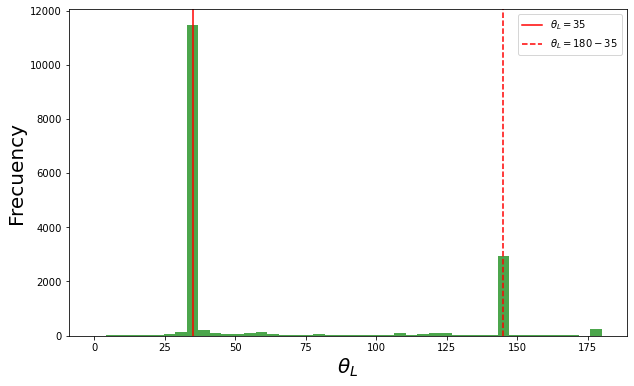

In [288]:
plt.figure(figsize=(10,6))

bins = np.linspace(0, 180, int(180/4))

plt.hist(angs['avgAngle'], bins=bins, color='g', alpha=0.7)
plt.axvline(35, c='r', label=r'$\theta_{L}=35$')
plt.axvline(180-35, c='r', ls='--', label=r'$\theta_{L}=180-35$')

plt.ylabel(r'Frecuency', size=20)
plt.xlabel(r'$\theta_{L}$', size=20)
plt.legend()
plt.show()

## Segmentate leafs

In [101]:
# Normals with PDAL
json = """
{
    "pipeline":[
         "../data/mock_vel2/toy_leaves.las",
        {
        "type":"filters.dbscan",
        "min_points":10,
        "eps":0.05,
        "dimensions":"X,Y,Z"
        },
        {
        "type":"writers.bpf",
        "filename":"../data/mock_vel2/toy_leaves_seg.bpf",
        "output_dims":"X,Y,Z,ClusterID"
        }
    ]
}
"""

pipeline = pdal.Pipeline(json)
count = pipeline.execute()
arrays = pipeline.arrays
metadata = pipeline.metadata
log = pipeline.log

In [112]:
# Normals with PDAL
json = """
{
    "pipeline":[
        "../data/mock_vel2/toy_leaves_seg.bpf",
        {
          "type":"filters.colorinterp",
          "ramp":"pestel_shades",
          "mad":true,
          "k":1.8,
          "dimension":"ClusterID"
        },
        {
        "type":"writers.las",
        "forward": "all",
        "filename":"../data/mock_vel2/toy_leaves_seg.las"
        },
        "../data/mock_vel2/toy_leaves_seg.las",
        {
        "type":"writers.pcd",
        "filename":"../data/mock_vel2/toy_leaves_seg.pcd"
        }
    ]
}
"""

pipeline = pdal.Pipeline(json)
count = pipeline.execute()
arrays = pipeline.arrays
metadata = pipeline.metadata
log = pipeline.log

In [103]:
downpcd = o3d.io.read_point_cloud("../data/mock_vel2/toy_leaves_seg.pcd")
o3d.visualization.draw_geometries([downpcd])

In [132]:
#
pcd = o3d.io.read_point_cloud("../data/mock_vel2/toy_leaves.pcd")

with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(
        pcd.cluster_dbscan(eps=0.04, min_points=6, print_progress=True))

max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
# o3d.visualization.draw_geometries([pcd])

[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.Precompute neighbors.[=>                                      ] 2%
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 6441
Precompute neighbors.[========================================] 100%
point cloud has 6441 clusters================>     ] 85%


In [133]:
o3d.visualization.draw_geometries([pcd])

## Mesh (not recommended)

In [11]:
#
pcd = o3d.io.read_point_cloud("../data/mock_vel2/toy_leaves.pcd")
# Compute Normals
o3d.geometry.PointCloud.estimate_normals(pcd, search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1,max_nn=30))


In [13]:

radii = [0.05, 0.08, 0.1]

rec_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_ball_pivoting(pcd, o3d.utility.DoubleVector(radii))
o3d.visualization.draw_geometries([pcd, rec_mesh])

## Filter Points that are coplanar
Estimate pointwise planarity, based on k-nearest neighbors. Returns a new dimension Coplanar where a value of 1 indicates that a point is part of a coplanar neighborhood (0 otherwise).

In [25]:
json = """
{
    "pipeline":[
         "../data/mock_vel2/toy_leaves.las",
         {
        "type":"filters.approximatecoplanar",
        "knn":8,
        "thresh1":25,
        "thresh2":6
        },
        {
        "type":"filters.range",
        "limits":"Coplanar[1:1]"
        },
         {
          "type" : "writers.las",
          "forward": "all",
          "filename" : "../data/mock_vel2/toy_leaves_cop.las"
         },
         {
          "type" : "writers.pcd",
          "filename" : "../data/mock_vel2/toy_leaves_cop.pcd"
         }  
    ]
}
"""

pipeline = pdal.Pipeline(json)
count = pipeline.execute()
arrays = pipeline.arrays
metadata = pipeline.metadata
log = pipeline.log

In [22]:
las = lp.read('../data/mock_vel2/toy_leaves.las')

In [23]:
print(las.header.point_count)
list(las.point_format.dimension_names)

272657


['X',
 'Y',
 'Z',
 'intensity',
 'return_number',
 'number_of_returns',
 'scan_direction_flag',
 'edge_of_flight_line',
 'classification',
 'synthetic',
 'key_point',
 'withheld',
 'scan_angle_rank',
 'user_data',
 'point_source_id',
 'gps_time',
 'red',
 'green',
 'blue']

In [26]:
!pcl_viewer ../data/mock_vel2/toy_leaves_*cop.pcd

The viewer window provides interactive commands; for help, press 'h' or 'H' from within the window.
> Loading ../data/mock_vel2/toy_leaves_cop.pcd [PCLVisualizer::setUseVbos] Has no effect when OpenGL version is ≥ 2
[done, 1710.2 ms : 98958 points]
Available dimensions: x y z intensity returnnumber numberofreturns scandirectionflag edgeofflightline classification scananglerank userdata pointsourceid gpstime red green blue coplanar
> Loading ../data/mock_vel2/toy_leaves_noncop.pcd [done, 2239.84 ms : 173699 points]
Available dimensions: x y z intensity returnnumber numberofreturns scandirectionflag edgeofflightline classification scananglerank userdata pointsourceid gpstime red green blue coplanar
